**Завдання 1**.
* Створити xlsx-документ, що містить дані про міста, їх населення, середній дохід, площу території
та наявність метро. Кількість записів у документів – 20.

In [ ]:
import pandas as pd

In [21]:
# Create a database
city_pop = {
    'city': ['kyiv', 'dnipro', 'donetsk', 'kharkiv', 'zaporizhia', 'ternopil', 'lviv',
             'ivano-frankivsk', 'mykolaiv', 'kherson', 'bakhmut', 'lutsk', 'poltava',
             'luhansk', 'odesa', 'sevastopol', 'yalta', 'shakhtarsk', 'mariupol', 'sumy'],
    'pop_number': [2_000_884, 966_400, 918_536, 900_000, 846_749, 718_384, 621_301,
                   610_507, 586_267, 580_697, 473_312, 313_950, 300_942, 299_895, 293_120,
                   240_735, 216_746, 148_547, 146_103, 64_753],
    'aver_income': [18500, 16000, 15480, 15000, 14900, 13400, 12500, 12600, 11218, 11200,
                    10350, 10500, 10300, 10000, 9500, 9800, 8350, 7300, 6000, 5500],
    'total_area': [839.2, 409.7, 358, 350, 334, 272, 249, 183.73, 179.8, 165.7, 141.6, 140, 103, 101,
                   100, 99, 88.29, 74.8, 66, 65.39],
    'subway': ['exist', 'exist', 'not exist', 'exist', 'not exist', 'not exist', 'not exist', 'not exist',
               'not exist', 'not exist', 'not exist', 'not exist', 'not exist', 'not exist', 'not exist',
               'not exist', 'not exist', 'not exist', 'not exist', 'not exist'],
    }

# Create a dataframe.
df = pd.DataFrame(data=city_pop, index=list(range(1, 21)))
print('City population:')
print(df)


City population:
               city  pop_number  aver_income  total_area     subway
1              kyiv     2000884        18500      839.20      exist
2            dnipro      966400        16000      409.70      exist
3           donetsk      918536        15480      358.00  not exist
4           kharkiv      900000        15000      350.00      exist
5        zaporizhia      846749        14900      334.00  not exist
6          ternopil      718384        13400      272.00  not exist
7              lviv      621301        12500      249.00  not exist
8   ivano-frankivsk      610507        12600      183.73  not exist
9          mykolaiv      586267        11218      179.80  not exist
10          kherson      580697        11200      165.70  not exist
11          bakhmut      473312        10350      141.60  not exist
12            lutsk      313950        10500      140.00  not exist
13          poltava      300942        10300      103.00  not exist
14          luhansk      299895

In [9]:
# Safe to a xlsx file.
df.to_excel('city.xlsx')

# Read from the xlsx file.
# pd.read_excel('city.xlsx', index_col=0)

**Завдання 2**.
* За допомогою Plotly візуалізувати залежності населення міста від його площі та середнього доходу від населення.
* Помістити ці графіки на один малюнок.

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [22]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Pop_number vs Total_area', 'Aver_income vs Pop_number'))
fig.add_trace(go.Scatter(x = df['pop_number'], y = df['total_area']), row = 1, col = 1)
fig.add_trace(go.Scatter(x = df['aver_income'], y = df['pop_number']), row = 1, col = 2)
fig.update_layout(height = 600, width = 800, title = "Subplot 1")
fig.show()

In [23]:
# Create a plot on the same figure
fig = make_subplots(rows = 4, cols = 1)
fig.add_scatter(y = df['pop_number'], row = 1, col = 1)
fig.add_scatter(y = df['total_area'], row = 2, col = 1)
fig.add_scatter(y = df['aver_income'], row = 3, col = 1)
fig.add_scatter(y = df['pop_number'], row = 4, col = 1)
fig.update_layout(height=600, width=800, title_text='Subplot 2')
fig.show()


**Завдання 3**.
* Побудувати матрицю кореляцій та візуалізувати її через Heatmap.

In [14]:
import plotly.graph_objects as go

In [24]:
# Correlation Heatmap.
fig = go.Figure()
data_corr = df.corr()
fig.add_trace(go.Heatmap(x = data_corr.columns, y = data_corr.index, z = data_corr))
fig.show()

C:\Users\oleks\AppData\Local\Temp\ipykernel_16216\1339178404.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Завдання 4**.
* Побудувати звіти про таблицю за допомогою Pandas Profiling та Sweetviz.
* Написати стисле порівняння цих звітів.

In [16]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(df)
print('ProfileReport')
profile.to_notebook_iframe()

ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
import sweetviz as sv

E:\Python\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

E:\Python\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |          | [  0%]   00:00 -> (? left)

E:\Python\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

E:\Python\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

E:\Python\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

E:\Python\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

E:\Python\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. U

Sweetviz



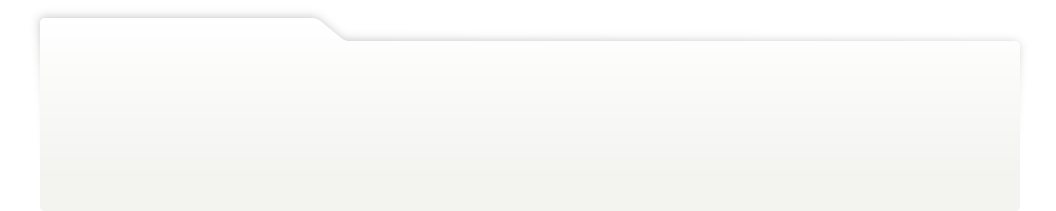
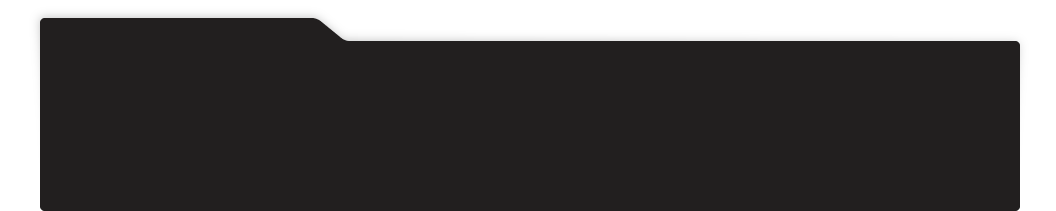
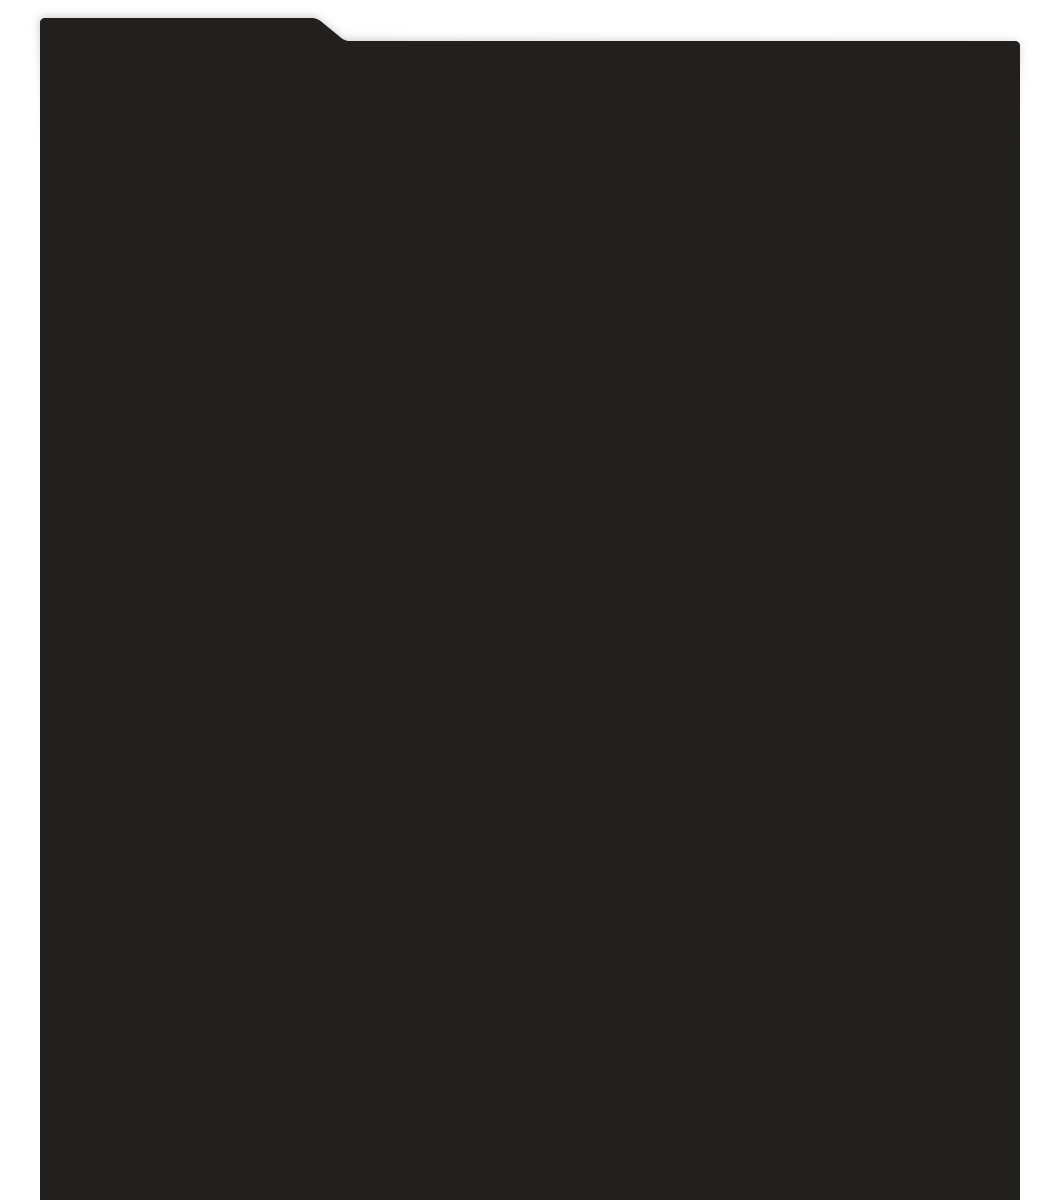
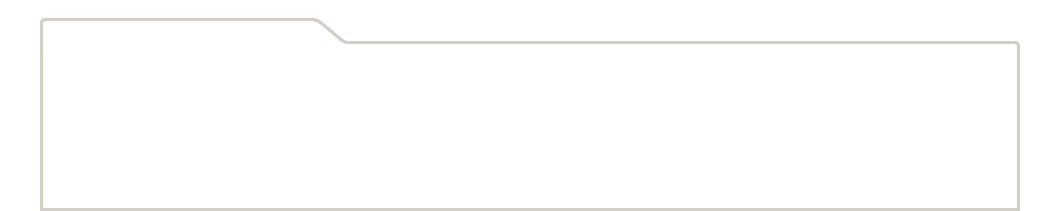
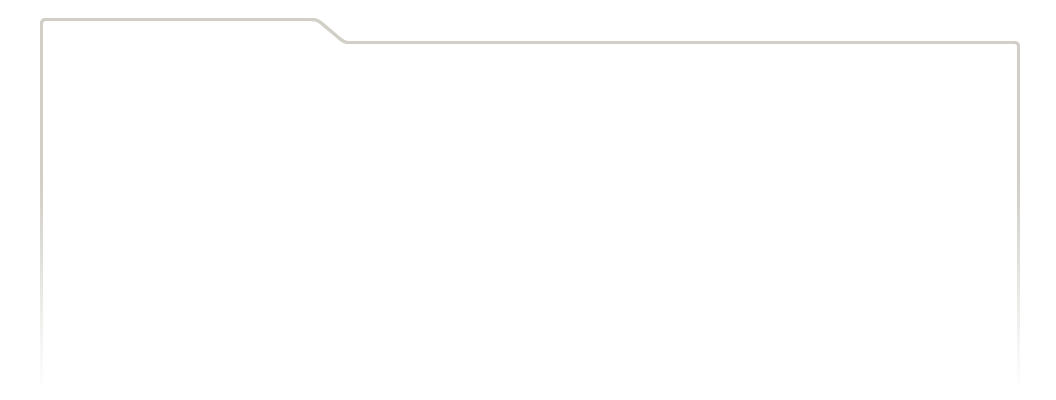
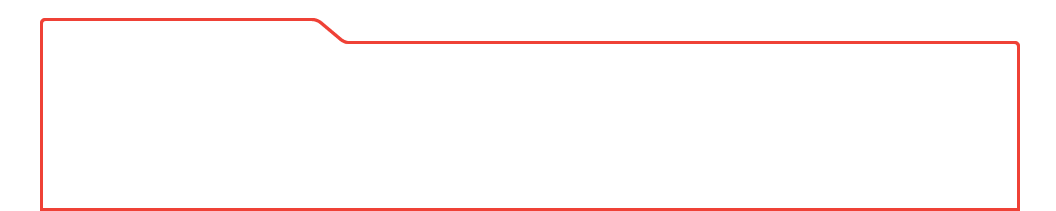
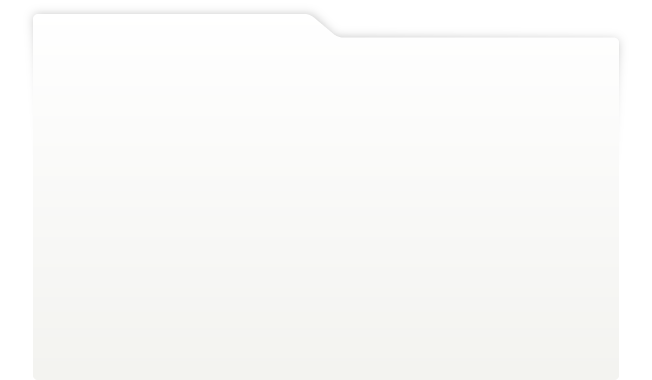
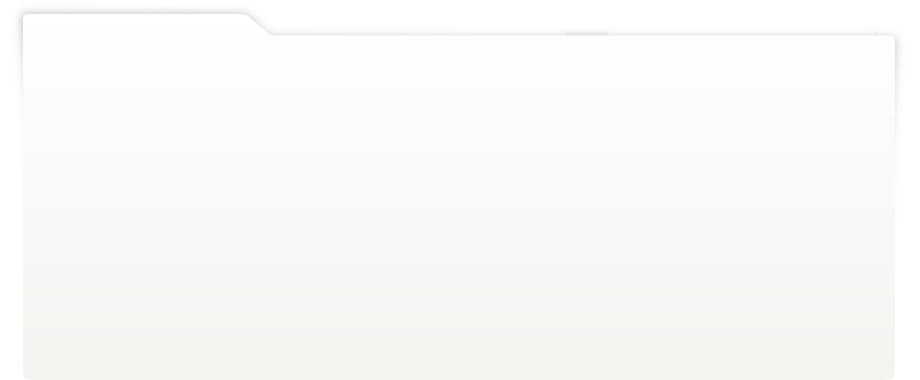
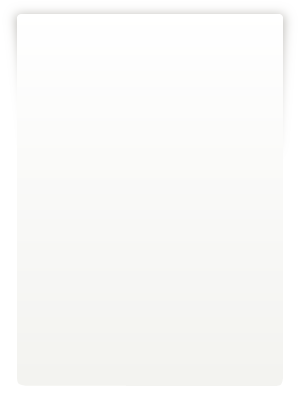
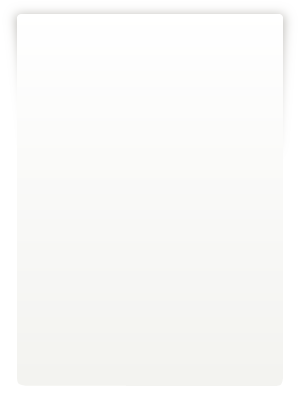
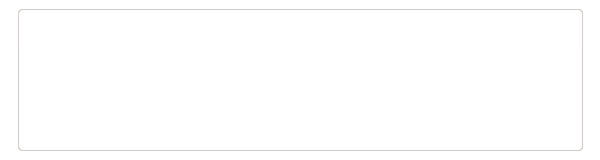
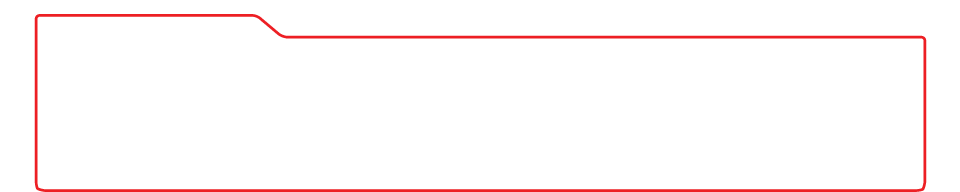
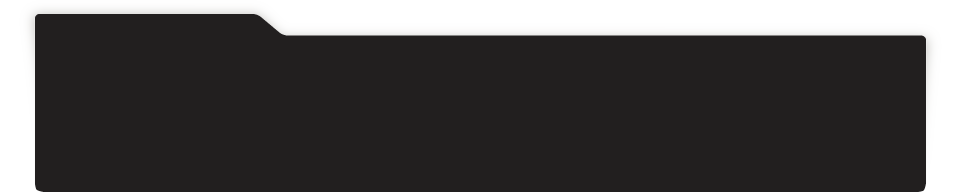
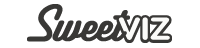
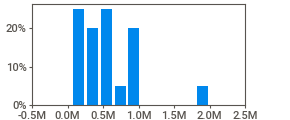
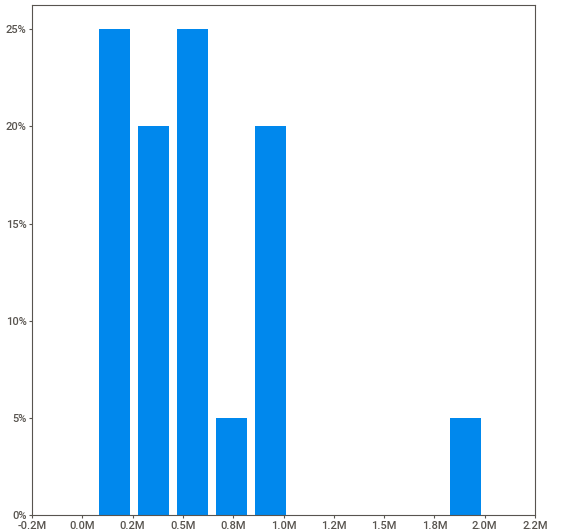
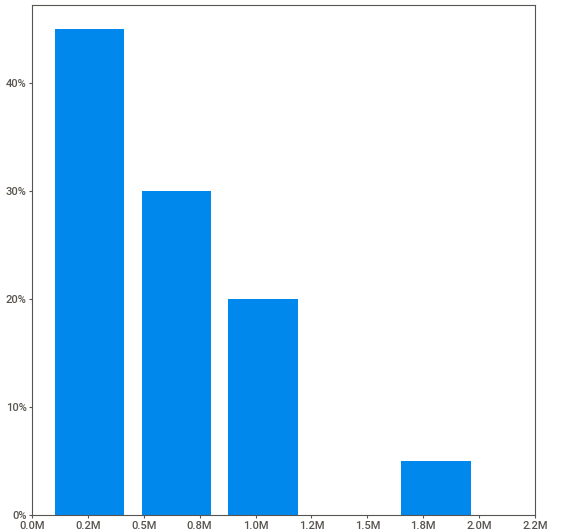
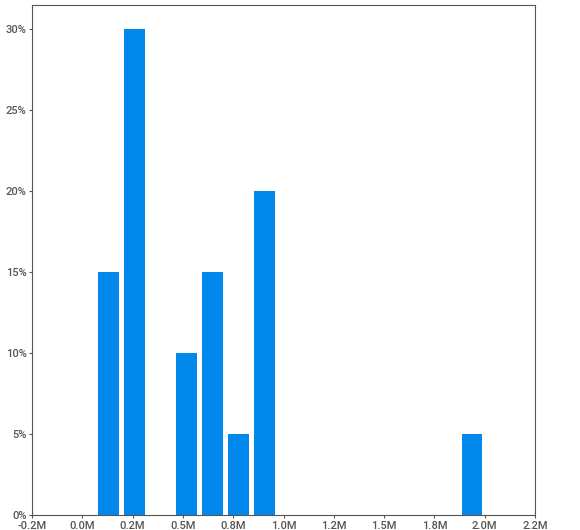
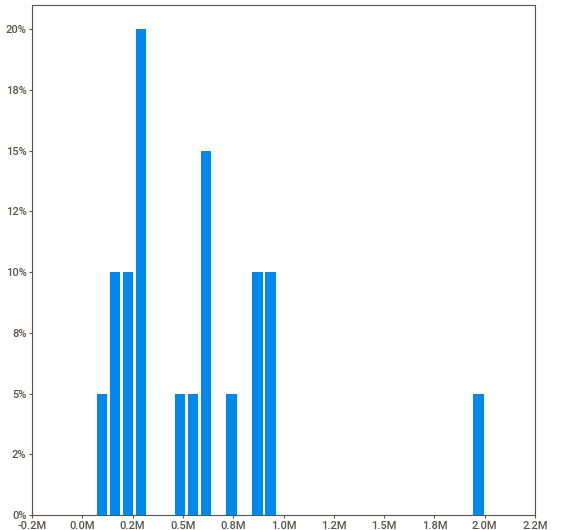
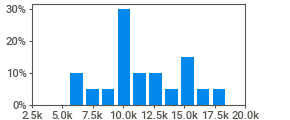
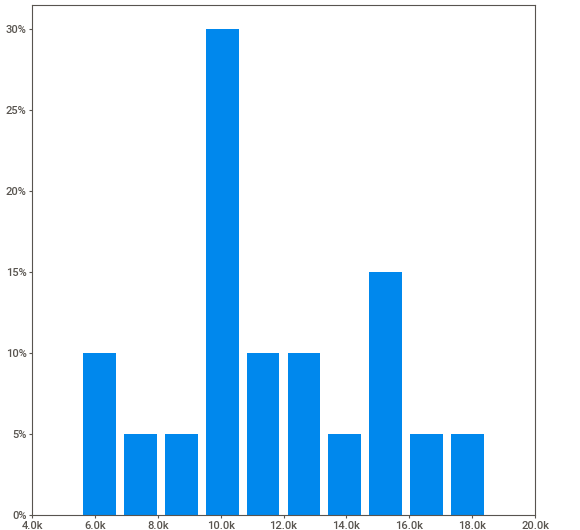
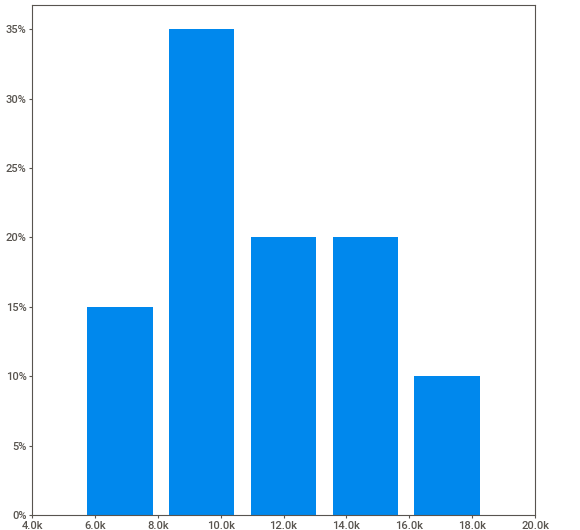
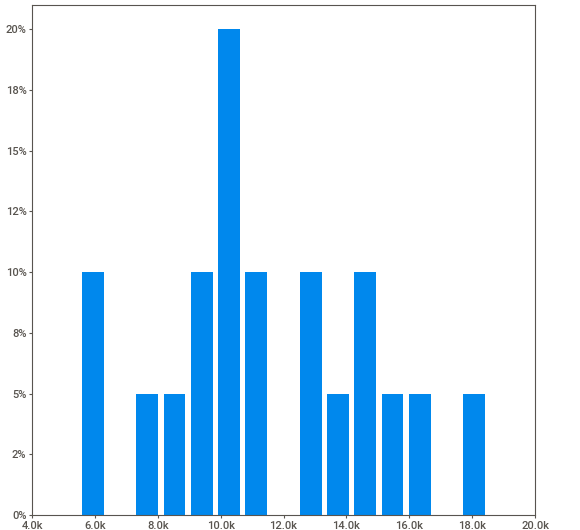
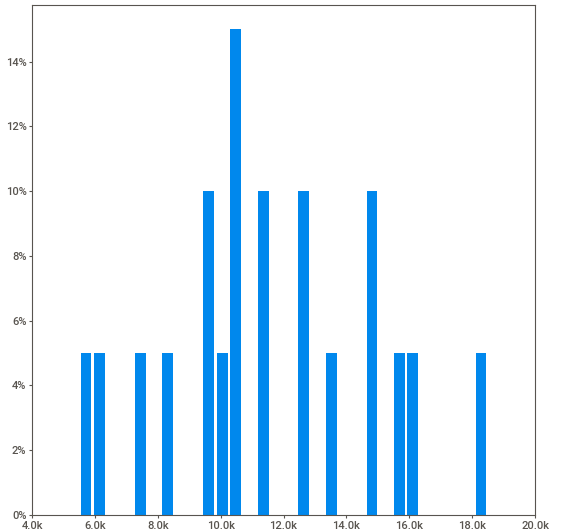
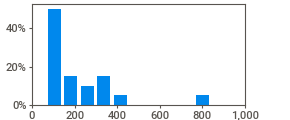
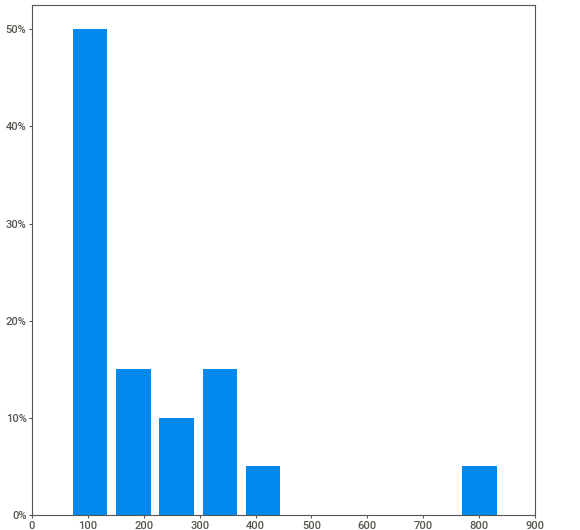
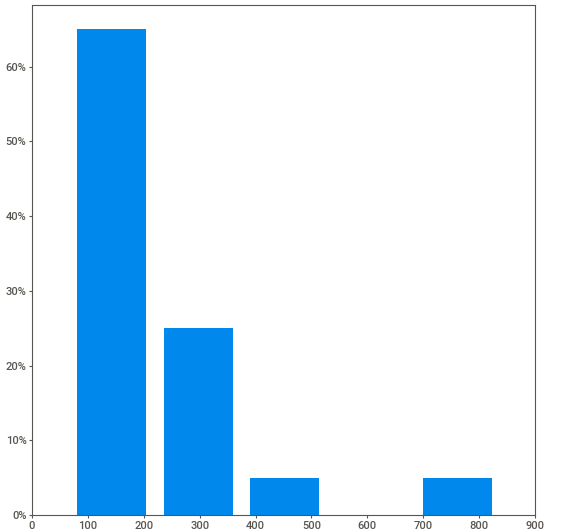
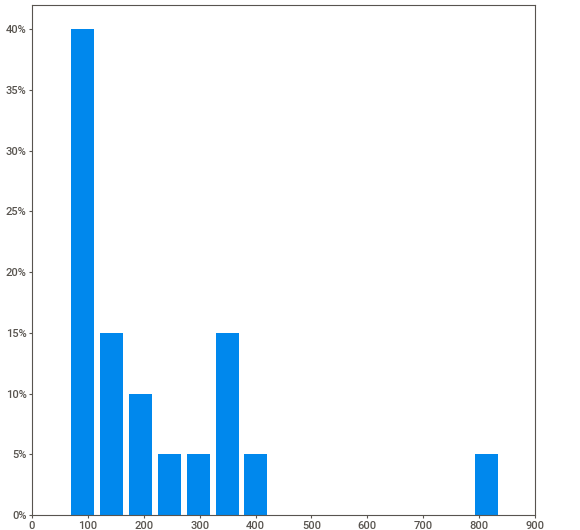
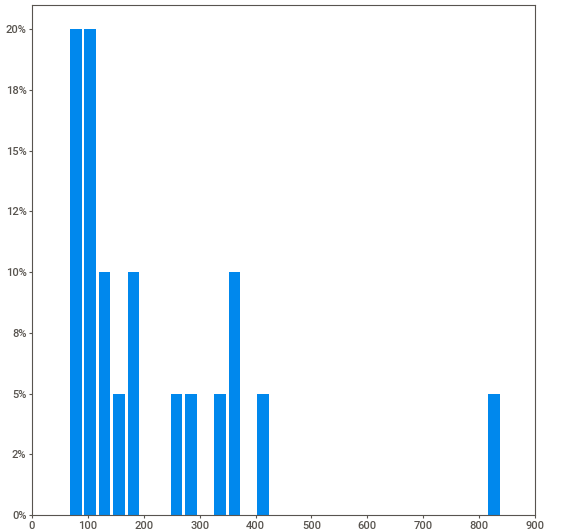
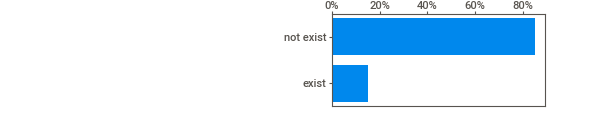
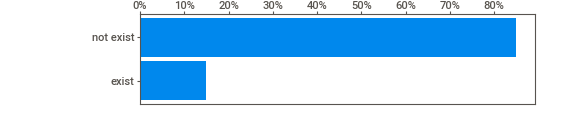
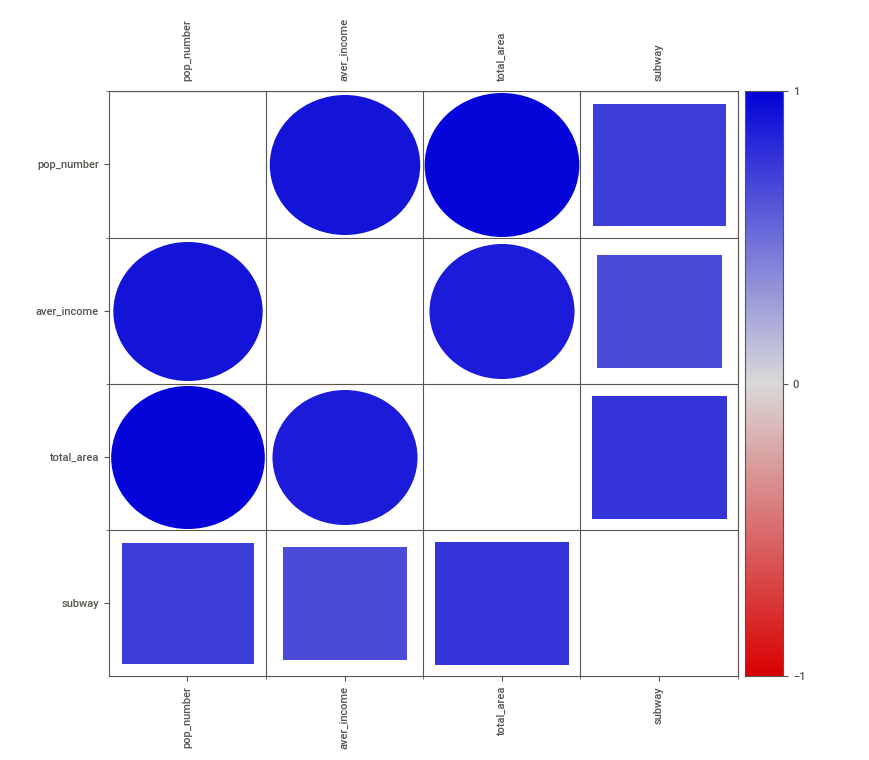
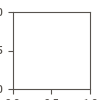

In [20]:
result = sv.analyze(df)
print('Sweetviz')
result.show_notebook()

### Порівняння звітів Profiling та Sweetviz ###

**Pandas-profiling**
* *Створює детальний звіт про конкретний датасет за відносно короткий час. Всередині звіту досить легко орієнтуватися. Одразу на першій сторінці звіту відображається описова статистика  і метрика про дані. Дуже зручні інструменти порівняння різних датасетів*.

**PSweetviz**
* *Порівнюючи з Pandas-profiling, то можна сказати, що це більш комплексний підхід до аналізу даних: з різних ракурсів відображаються дані; можливість порівнянь двох версій одного набору датасету. Сучасний і красиво оформлений інструмент. Більш клікабельний і рухливий. Проте, як на мене, потребує більше часу, щоб в ньому розібратися*.